<a href="https://colab.research.google.com/github/Devansharma/Health-App/blob/main/Liver_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv("Indian Liver Patient Dataset (ILPD).csv")

In [3]:
df.head()

,age,gender,tot_bilirubin,direct_bilirubin,tot_proteins,albumin,ag_ratio,sgpt,sgot,alkphos,is_patient
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [4]:
# rename column names to make it more user-friendly
df.columns = ['age', 'gender', 'total_bilirubin', 'direct_bilirubin', 'total_protiens', 'albumin', 'albumin_and_globulin_ratio',
              'alamine_aminotransferase', 'aspartate_aminotransferase', 'alkaline_phosphotase', 'is_patient']

In [5]:
df.head()

,age,gender,total_bilirubin,direct_bilirubin,total_protiens,albumin,albumin_and_globulin_ratio,alamine_aminotransferase,aspartate_aminotransferase,alkaline_phosphotase,is_patient
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [6]:
df.describe()

,age,total_bilirubin,direct_bilirubin,total_protiens,albumin,albumin_and_globulin_ratio,alamine_aminotransferase,aspartate_aminotransferase,alkaline_phosphotase,is_patient
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   age                         583 non-null    int64  
 1   gender                      583 non-null    object 
 2   total_bilirubin             583 non-null    float64
 3   direct_bilirubin            583 non-null    float64
 4   total_protiens              583 non-null    int64  
 5   albumin                     583 non-null    int64  
 6   albumin_and_globulin_ratio  583 non-null    int64  
 7   alamine_aminotransferase    583 non-null    float64
 8   aspartate_aminotransferase  583 non-null    float64
 9   alkaline_phosphotase        579 non-null    float64
 10  is_patient                  583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [8]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [9]:
data  = df.apply(le.fit_transform)
data

,age,gender,total_bilirubin,direct_bilirubin,total_protiens,albumin,albumin_and_globulin_ratio,alamine_aminotransferase,aspartate_aminotransferase,alkaline_phosphotase,is_patient
0,58,0,3,0,72,6,8,34,21,31,0
1,55,1,69,45,236,54,86,41,20,23,0
2,55,1,56,36,202,50,58,36,21,30,0
3,52,1,6,3,67,4,10,34,22,37,0
4,64,1,35,19,80,17,49,39,12,4,0
...,...,...,...,...,...,...,...,...,...,...,...
578,53,1,1,0,204,10,24,25,4,2,1
579,34,1,2,0,5,25,21,26,20,42,0
580,46,1,4,1,118,38,39,30,20,37,0
581,25,1,9,4,69,19,22,34,22,37,0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   age                         583 non-null    int64  
 1   gender                      583 non-null    object 
 2   total_bilirubin             583 non-null    float64
 3   direct_bilirubin            583 non-null    float64
 4   total_protiens              583 non-null    int64  
 5   albumin                     583 non-null    int64  
 6   albumin_and_globulin_ratio  583 non-null    int64  
 7   alamine_aminotransferase    583 non-null    float64
 8   aspartate_aminotransferase  583 non-null    float64
 9   alkaline_phosphotase        579 non-null    float64
 10  is_patient                  583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [11]:
x = data.drop('is_patient', axis=1)
y = data['is_patient']

In [12]:
from sklearn.preprocessing import MinMaxScaler
scaling = MinMaxScaler()
data = scaling.fit_transform(data)
data = pd.DataFrame(data)
data

,0,1,2,3,4,5,6,7,8,9,10
0,0.816901,0.0,0.026786,0.000000,0.274809,0.039735,0.045455,0.596491,0.538462,0.449275,0.0
1,0.774648,1.0,0.616071,0.569620,0.900763,0.357616,0.488636,0.719298,0.512821,0.333333,0.0
2,0.774648,1.0,0.500000,0.455696,0.770992,0.331126,0.329545,0.631579,0.538462,0.434783,0.0
3,0.732394,1.0,0.053571,0.037975,0.255725,0.026490,0.056818,0.596491,0.564103,0.536232,0.0
4,0.901408,1.0,0.312500,0.240506,0.305344,0.112583,0.278409,0.684211,0.307692,0.057971,0.0
...,...,...,...,...,...,...,...,...,...,...,...
578,0.746479,1.0,0.008929,0.000000,0.778626,0.066225,0.136364,0.438596,0.102564,0.028986,1.0
579,0.478873,1.0,0.017857,0.000000,0.019084,0.165563,0.119318,0.456140,0.512821,0.608696,0.0
580,0.647887,1.0,0.035714,0.012658,0.450382,0.251656,0.221591,0.526316,0.512821,0.536232,0.0
581,0.352113,1.0,0.080357,0.050633,0.263359,0.125828,0.125000,0.596491,0.564103,0.536232,0.0


<AxesSubplot:>

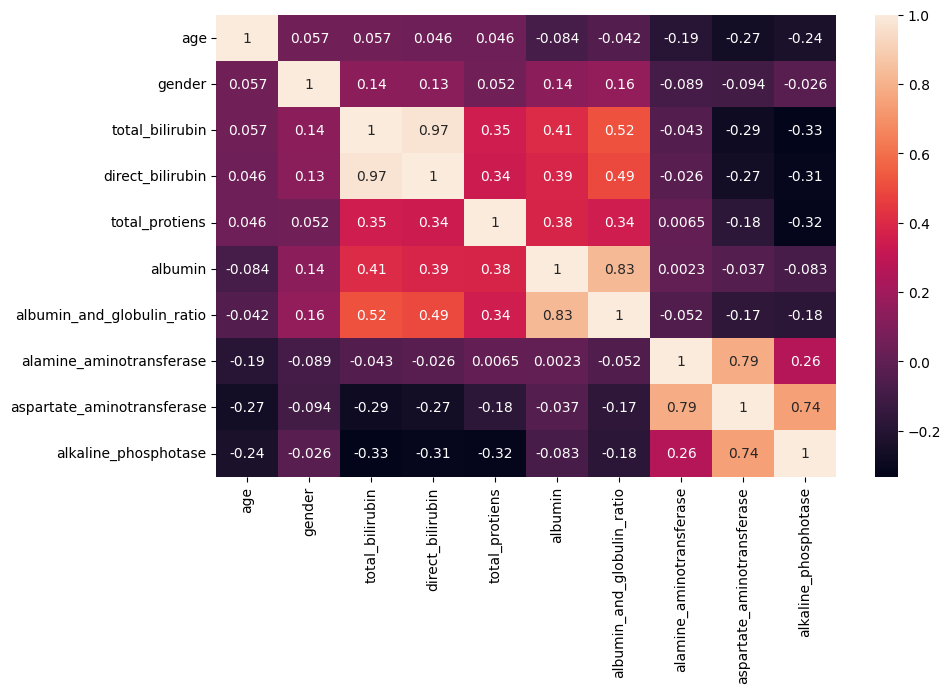

In [13]:
plt.figure(figsize=(10, 6))
sns.heatmap(x.corr(), annot=True)

In [14]:
# Data Splitting
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [15]:
# Model Training
from sklearn.ensemble import RandomForestClassifier


rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [16]:
# Model Evaluation
y_pred = rf_classifier.predict(X_test)

In [17]:
# Evaluate the model using metrics like accuracy, confusion matrix, and classification report
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

In [18]:
print(f'Accuracy: {accuracy:.2f}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(classification_rep)

Accuracy: 0.72
Confusion Matrix:
[[76 11]
 [22  8]]
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.87      0.82        87
           1       0.42      0.27      0.33        30

    accuracy                           0.72       117
   macro avg       0.60      0.57      0.57       117
weighted avg       0.68      0.72      0.69       117



In [19]:
# Save the Model to a .pkl File
import joblib


joblib.dump(rf_classifier, 'liver.pkl')

['liver.pkl']